In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


**Economic_index: supports financial decision**


**Environmental_index:supports environmental decision**


In [5]:
df_ml = pd.read_csv("../data/final/EV_ICE_ML_READY.csv")
df_ml.head()


,State,City,Vehicle Class,Cost_Advantage_₹_per_km,CO2_Advantage_kg_per_km,Charging_Density,Maintenance Cost (₹/km)
0,Maharashtra,Mumbai,2W,1.838044,0.022693,0.0,0.2
1,Maharashtra,Mumbai,2W,1.838044,0.022693,0.0,0.2
2,Maharashtra,Mumbai,2W,1.838044,0.022693,0.0,0.2
3,Maharashtra,Mumbai,3W,1.567800,0.003413,0.0,0.3
4,Maharashtra,Mumbai,3W,1.567800,0.003413,0.0,0.3


In [6]:
df_ml = pd.read_csv("../data/final/EV_ICE_ML_READY.csv")
df_ml.head()


,State,City,Vehicle Class,Cost_Advantage_₹_per_km,CO2_Advantage_kg_per_km,Charging_Density,Maintenance Cost (₹/km)
0,Maharashtra,Mumbai,2W,1.838044,0.022693,0.0,0.2
1,Maharashtra,Mumbai,2W,1.838044,0.022693,0.0,0.2
2,Maharashtra,Mumbai,2W,1.838044,0.022693,0.0,0.2
3,Maharashtra,Mumbai,3W,1.567800,0.003413,0.0,0.3
4,Maharashtra,Mumbai,3W,1.567800,0.003413,0.0,0.3


In [7]:
df_ml.dtypes


State                       object
City                        object
Vehicle Class               object
Cost_Advantage_₹_per_km    float64
CO2_Advantage_kg_per_km    float64
Charging_Density           float64
Maintenance Cost (₹/km)    float64
dtype: object

In [9]:
numeric_df = df_ml.select_dtypes(include=["int64", "float64"])
numeric_df.head()


,Cost_Advantage_₹_per_km,CO2_Advantage_kg_per_km,Charging_Density,Maintenance Cost (₹/km)
0,1.838044,0.022693,0.0,0.2
1,1.838044,0.022693,0.0,0.2
2,1.838044,0.022693,0.0,0.2
3,1.567800,0.003413,0.0,0.3
4,1.567800,0.003413,0.0,0.3


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
X_scaled


array([[ 1.6236783 ,  0.50558088, -0.30756234, -0.88900089],
       [ 1.6236783 ,  0.50558088, -0.30756234, -0.88900089],
       [ 1.6236783 ,  0.50558088, -0.30756234, -0.88900089],
       [ 1.58851725, -1.39659592, -0.30756234, -0.50800051],
       [ 1.58851725, -1.39659592, -0.30756234, -0.50800051],
       [ 1.58851725, -1.39659592, -0.30756234, -0.50800051],
       [ 1.73712695,  0.89101504, -0.30756234,  1.3970014 ],
       [ 1.73712695,  0.89101504, -0.30756234,  1.3970014 ],
       [ 1.73712695,  0.89101504, -0.30756234,  1.3970014 ],
       [ 0.8916932 ,  0.50558088, -0.30756234, -0.88900089],
       [ 0.8916932 ,  0.50558088, -0.30756234, -0.88900089],
       [ 0.8916932 ,  0.50558088, -0.30756234, -0.88900089],
       [ 0.8916932 ,  0.50558088, -0.30756234, -0.88900089],
       [ 0.8916932 ,  0.50558088, -0.30756234, -0.88900089],
       [ 0.8916932 ,  0.50558088, -0.30756234, -0.88900089],
       [ 0.8916932 ,  0.50558088, -0.30756234, -0.88900089],
       [ 0.8916932 ,  0.

In [12]:
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_


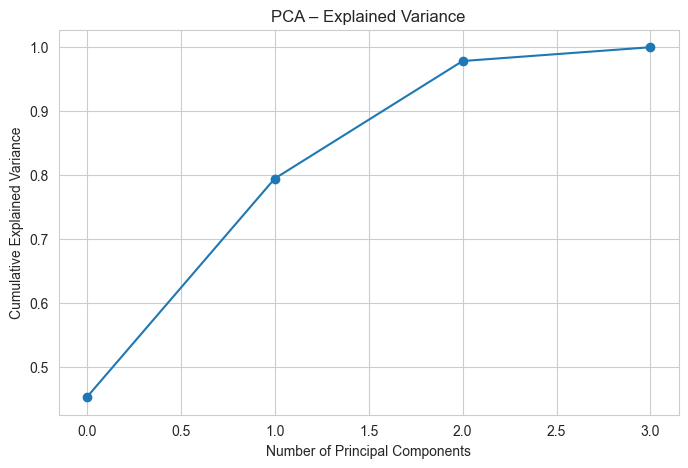

In [13]:
plt.figure(figsize=(8,5))
plt.plot(
    np.cumsum(explained_variance),
    marker="o"
)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Explained Variance")
plt.grid(True)
plt.show()


In [14]:
pca_2 = PCA(n_components=2)
principal_components = pca_2.fit_transform(X_scaled)

df_pca = pd.DataFrame(
    principal_components,
    columns=["Economic_Index", "Environmental_Index"]
)

df_pca.head()


,Economic_Index,Environmental_Index
0,1.288493,0.381962
1,1.288493,0.381962
2,1.288493,0.381962
3,1.556094,-0.761225
4,1.556094,-0.761225


In [15]:
df_pca_full = pd.concat(
    [df_ml.reset_index(drop=True), df_pca],
    axis=1
)

df_pca_full.head()


,State,City,Vehicle Class,Cost_Advantage_₹_per_km,CO2_Advantage_kg_per_km,Charging_Density,Maintenance Cost (₹/km),Economic_Index,Environmental_Index
0,Maharashtra,Mumbai,2W,1.838044,0.022693,0.0,0.2,1.288493,0.381962
1,Maharashtra,Mumbai,2W,1.838044,0.022693,0.0,0.2,1.288493,0.381962
2,Maharashtra,Mumbai,2W,1.838044,0.022693,0.0,0.2,1.288493,0.381962
3,Maharashtra,Mumbai,3W,1.567800,0.003413,0.0,0.3,1.556094,-0.761225
4,Maharashtra,Mumbai,3W,1.567800,0.003413,0.0,0.3,1.556094,-0.761225


In [16]:
loadings = pd.DataFrame(
    pca_2.components_.T,
    index=numeric_df.columns,
    columns=["Economic_Index", "Environmental_Index"]
)

loadings


,Economic_Index,Environmental_Index
Cost_Advantage_₹_per_km,0.632805,0.345439
CO2_Advantage_kg_per_km,-0.271055,0.677333
Charging_Density,0.418365,0.501291
Maintenance Cost (₹/km),-0.592501,0.413035
